# Base Models

* Logistic Regression
* Decision Trees
* Random Forest

In [1]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Import prep data
df = pd.read_csv('prep_data.csv')
df.head()

,salary,satisfaction_level,time_spend_company,average_montly_hours,Work_accident,number_project,churn,last_evaluation,promotion_last_5years
0,2,0.80,6,262,0,5,1,0.86,0
1,2,0.11,4,272,0,7,1,0.88,0
2,1,0.72,5,223,0,5,1,0.87,0
3,1,0.92,5,259,0,5,1,0.85,0
4,1,0.89,5,224,0,5,1,1.00,0


## Logistic Model

In [6]:
#set variables

X = df.drop(['churn'], axis = 1)
y = df['churn']

In [7]:
#Split data into test, train and val sets

from sklearn.model_selection import train_test_split

X1_rest, X1_test, y1_rest, y1_test = train_test_split(X,
                                                 y,
                                                 random_state = 42,
                                                 test_size = 0.2)

In [8]:
#split rest set into train and validation set
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_rest,
                                                  y1_rest,
                                                  random_state = 42,
                                                 test_size = 0.25)

In [10]:
print(X1_train.shape)
print(X1_val.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_val.shape)
print(y1_test.shape)

(2466, 8)
(823, 8)
(823, 8)
(2466,)
(823,)
(823,)


In [11]:
#scale data
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
scaler.fit(X1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [26]:
#Transform data
X1_train_scale = scaler.transform(X1_train)
X1_val_scale = scaler.transform(X1_val)
X1_test_scale = scaler.transform(X1_test)

In [27]:
pd.DataFrame(X1_train_scale).head(3)

,0,1,2,3,4,5,6,7
0,0.742525,1.274000,-0.678195,-1.016265,-0.373572,-0.921606,-0.824482,-0.128406
1,0.742525,-1.596986,0.042059,1.192228,-0.373572,1.269985,-1.660215,-0.128406
2,-0.901161,-0.144993,-1.398449,0.725047,-0.373572,-0.921606,-1.493069,-0.128406


In [17]:
#Check class weights
df['churn'].value_counts(normalize = True).round(2) * 100

0    59.0
1    41.0
Name: churn, dtype: float64

In [28]:
#import LogisticRegression class and instantiate the class
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state = 42)

In [29]:
log_model.fit(X1_train_scale, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
#Make prediction
y1_train_pred = log_model.predict(X1_train_scale)
y1_val_pred = log_model.predict(X1_val_scale)

In [63]:
#Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error, plot_confusion_matrix, accuracy_score, recall_score

In [60]:
log_model.score(X1_train_scale,y1_train), log_model.score(X1_val_scale, y1_val)

(0.8819951338199513, 0.9015795868772782)

In [53]:
accuracy_score(y1_train, y1_train_pred)

0.8819951338199513

In [54]:
accuracy_score(y1_val, y1_val_pred)

0.9015795868772782

In [67]:
recall_score(y1_train, y1_train_pred), recall_score(y1_val, y1_val_pred)

(0.8715415019762845, 0.9230769230769231)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression (Slightly Unbalanced Class)')

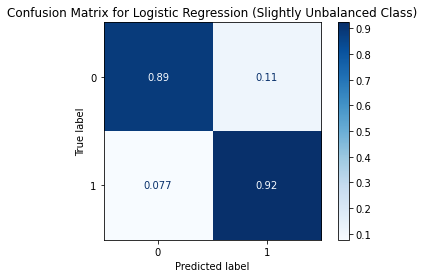

In [79]:
plot_confusion_matrix(log_model, 
                      X1_val_scale,
                      y1_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for Logistic Regression (Slightly Unbalanced Class)')

### Balancing the classes

In [35]:
log_model_bal = LogisticRegression(class_weight ='balanced', random_state = 42)

In [36]:
log_model_bal.fit(X1_train_scale, y1_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#Make prediction
y2_train_pred = log_model_bal.predict(X1_train_scale)
y2_val_pred = log_model_bal.predict(X1_val_scale)

In [68]:
log_model_bal.score(X1_train_scale,y1_train), log_model_bal.score(X1_val_scale, y1_val)

(0.8852392538523925, 0.8979343863912516)

In [69]:
recall_score(y1_train, y2_train_pred), recall_score(y1_val, y2_val_pred)

(0.9130434782608695, 0.9437869822485208)

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression (Balanced Class)')

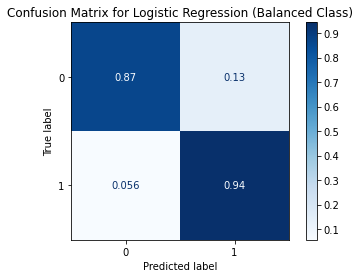

In [78]:
plot_confusion_matrix(log_model_bal, 
                      X1_val_scale,
                      y1_val,
                      cmap='Blues', 
                      normalize='true')
plt.title('Confusion Matrix for Logistic Regression (Balanced Class)')

### Logistic Regression Summary
* Balancing the classes gave lower scores for both Accuracy but higher scores for Recall
* Since we are more interested in Recall score, and the balanced class model gave higher recall score, the later model is preferred

## Decision Tree Model

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
#Instantaite the class
dt_model = DecisionTreeClassifier(random_state = 42)

In [73]:
#Fit the model
dt_model.fit(X1_train, y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [74]:
#Get Accuracy Score
dt_model.score(X1_train,y1_train), dt_model.score(X1_val, y1_val)

(1.0, 0.9635479951397327)

In [75]:
#Make predictions
y1_train_pred = dt_model.predict(X1_train)
y1_val_pred = dt_model.predict(X1_val)

In [76]:
#Get Recall score
recall_score(y1_val, y1_val_pred)

0.9704142011834319

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

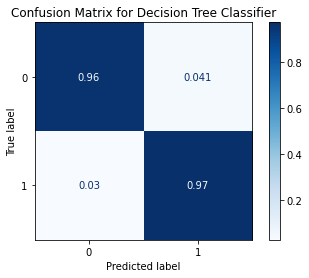

In [80]:
#Plot Confusion Matrix
plot_confusion_matrix(dt_model, 
                      X1_val,
                      y1_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Decision Tree Classifier')

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf_model = RandomForestClassifier(random_state = 42)

In [90]:
#Fit the model
rf_model.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [91]:
#Make predictions
y3_train_pred = rf_model.predict(X1_train)
y3_val_pred = rf_model.predict(X1_val)

In [92]:
#Get Accuracy Scores
accuracy_score(y1_train, y3_train_pred), accuracy_score(y1_val, y3_val_pred)

(1.0, 0.9793438639125152)

In [93]:
#Get Recall Score
recall_score(y1_train, y3_train_pred), recall_score(y1_val, y3_val_pred)

(1.0, 0.9704142011834319)

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

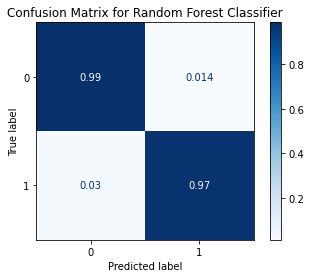

In [94]:
#Plot Confusion Matrix
plot_confusion_matrix(rf_model, 
                      X1_val,
                      y1_val,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Random Forest Classifier')

## Summary of the Models

* Logistics model has val Accuracy and recall scores of 0.89 and 0.94 respectively
* Decision Tree Classifier increased on same metrics to 0.96 and 0.97 respectively
* Random Forest Classifier didn't make much improvements off Decision Tree. Same metrics gave 0.979 and 0.97 respectively